In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('Language_Detection.csv')

**Step 1: Load and Prepare the Dataset**

In [2]:
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [3]:
df['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [4]:
df.shape

(10337, 2)

In [5]:
# Extract features and labels

X = df['Text']
y = df['Language']

# Convert the target labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

**Step 2: Vectorize the Text Data**

In [6]:
# Use TfidfVectorizer to transform text into numerical format
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


**Gaussian Naive Bayes**

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Convert sparse matrix to dense as GaussianNB expects dense input
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_dense, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test_dense)

# Calculate accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb}")


Gaussian Naive Bayes Accuracy: 0.9381044487427466


**(b) Multinomial Naive Bayes**

- Multinomial Naive Bayes is better suited for discrete data like word counts or frequencies.

In [8]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Multinomial Naive Bayes
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_mnb = mnb.predict(X_test_tfidf)

# Calculate accuracy
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb}")


Multinomial Naive Bayes Accuracy: 0.9530947775628626


In [9]:
print(f"Gaussian NB Accuracy: {accuracy_gnb}")
print(f"Multinomial NB Accuracy: {accuracy_mnb}")


Gaussian NB Accuracy: 0.9381044487427466
Multinomial NB Accuracy: 0.9530947775628626


**CNN**

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Load the dataset
data = pd.read_csv('Language_Detection.csv')

# Prepare the data
X = data['Text'].values  # Input text data
y = data['Language'].values  # Language labels

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
max_len = 100  # Maximum sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
cnn_model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train_pad, y_train, epochs=5, validation_split=0.2)

# Evaluate CNN model
cnn_accuracy = cnn_model.evaluate(X_test_pad, y_test, verbose=0)[1]
print(f'CNN Accuracy: {cnn_accuracy * 100:.2f}%')


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3724 - loss: 2.1094 - val_accuracy: 0.9353 - val_loss: 0.2587
Epoch 2/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9540 - loss: 0.1873 - val_accuracy: 0.9504 - val_loss: 0.1865
Epoch 3/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9691 - loss: 0.1024 - val_accuracy: 0.9504 - val_loss: 0.1703
Epoch 4/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9702 - loss: 0.0978 - val_accuracy: 0.9504 - val_loss: 0.1805
Epoch 5/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9697 - loss: 0.0967 - val_accuracy: 0.9516 - val_loss: 0.1687
CNN Accuracy: 94.78%


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


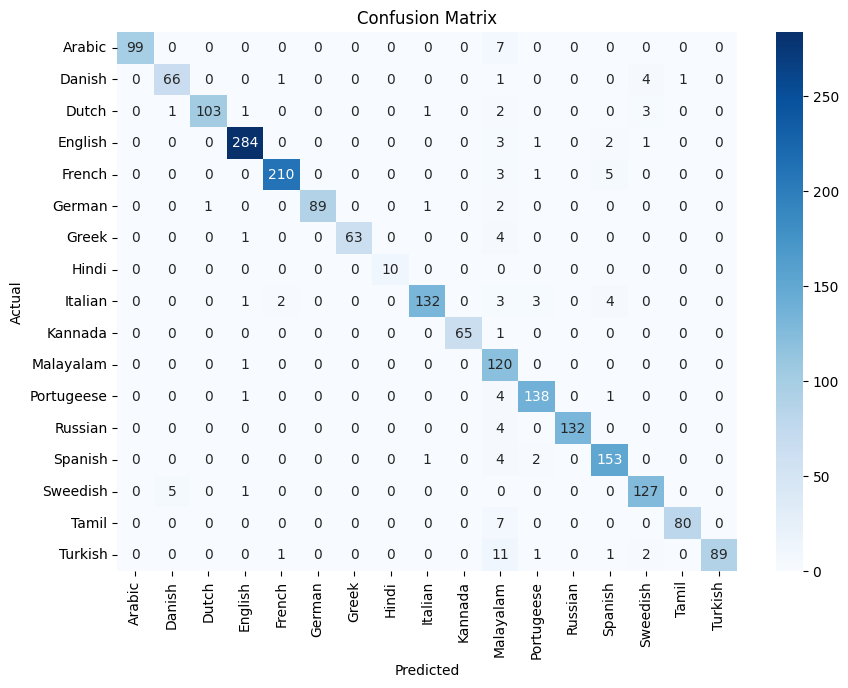

              precision    recall  f1-score   support

      Arabic       1.00      0.93      0.97       106
      Danish       0.92      0.90      0.91        73
       Dutch       0.99      0.93      0.96       111
     English       0.98      0.98      0.98       291
      French       0.98      0.96      0.97       219
      German       1.00      0.96      0.98        93
       Greek       1.00      0.93      0.96        68
       Hindi       1.00      1.00      1.00        10
     Italian       0.98      0.91      0.94       145
     Kannada       1.00      0.98      0.99        66
   Malayalam       0.68      0.99      0.81       121
  Portugeese       0.95      0.96      0.95       144
     Russian       1.00      0.97      0.99       136
     Spanish       0.92      0.96      0.94       160
    Sweedish       0.93      0.95      0.94       133
       Tamil       0.99      0.92      0.95        87
     Turkish       1.00      0.85      0.92       105

    accuracy              

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = cnn_model.predict(X_test_pad)
y_pred_labels = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report for more metrics
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))


In [28]:
def predict_language(input_text):
    # Convert the input text to a sequence of integers
    input_seq = tokenizer.texts_to_sequences([input_text])

    # Pad the sequence to match the input shape of the model
    input_pad = pad_sequences(input_seq, maxlen=max_len)

    # Get the prediction from the model
    prediction = cnn_model.predict(input_pad)

    # Get the predicted label (class)
    predicted_label = np.argmax(prediction, axis=1)

    # Map the predicted label back to the original language
    predicted_language = label_encoder.inverse_transform(predicted_label)

    return predicted_language[0]

# Example usage 1
input_text = "என் இன்பம்."
predicted_language = predict_language(input_text)
print(f'Predicted Language: {predicted_language}')

# Example usage 2
input_text = "ഇല്ല, ഞാൻ അങ്ങനെ വിചാരിക്കുന്നില്ല."
predicted_language = predict_language(input_text)
print(f'Predicted Language: {predicted_language}')

# Example usage 3
input_text = "ನನಗೆ ತಿಳಿದಿಲ್ಲ ಎಂದು ನಾನು ಹೆದರುತ್ತೇನೆ"
predicted_language = predict_language(input_text)
print(f'Predicted Language: {predicted_language}')

# Example usage 4
input_text = "बहुत बहुत शुक्रिया। आप कैसे हैं?"
predicted_language = predict_language(input_text)
print(f'Predicted Language: {predicted_language}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Predicted Language: Tamil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Language: Malayalam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Language: Kannada
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Language: Hindi


**LSTM**

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [30]:
# Load the dataset
df = pd.read_csv('Language_Detection.csv')

# Features and labels
X = df['Text']  # Text column containing the input sentences
y = df['Language']  # Language column containing the target languages

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Padding the sequences to ensure uniform input size
max_seq_length = max([len(x) for x in X_seq])  # Determine the max sequence length
X_padded = pad_sequences(X_seq, maxlen=max_seq_length)

# Encoding the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)


In [32]:
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size based on the tokenizer

model = Sequential()

# Embedding layer to convert tokens into dense vectors
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_seq_length))

# LSTM layer to capture sequential patterns
model.add(LSTM(128, return_sequences=False))

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout to prevent overfitting

# Output layer (softmax for multiclass classification)
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [34]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 24s 170ms/step - accuracy: 0.1918 - loss: 2.5458 - val_accuracy: 0.6717 - val_loss: 1.1940
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 22s 166ms/step - accuracy: 0.7306 - loss: 0.8922 - val_accuracy: 0.9304 - val_loss: 0.2847
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 168ms/step - accuracy: 0.9483 - loss: 0.2030 - val_accuracy: 0.9323 - val_loss: 0.2273
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.9801 - loss: 0.0912 - val_accuracy: 0.9603 - val_loss: 0.1457
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 168ms/step - accuracy: 0.9939 - loss: 0.0352 - val_accuracy: 0.9603 - val_loss: 0.1458
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 40s 162ms/step - accuracy: 0.9971 - loss: 0.0233 - val_accuracy: 0.9565 - val_loss: 0.1615
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 42s 167ms/step - accuracy: 0.9970 - loss: 0.0172 - val_accuracy: 0.9589 - val_loss: 0.1433
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - accuracy: 0.9977 - loss: 0

In [36]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9671 - loss: 0.1472
Test Accuracy: 96.52%


In [38]:
# Assuming you have already calculated the accuracies for the models
print(f'Naive Bayes Accuracy: {accuracy_gnb * 100:.2f}%')
print(f'CNN Accuracy: {cnn_accuracy * 100:.2f}%')
print(f'LSTM Accuracy: {test_accuracy * 100:.2f}%')

Naive Bayes Accuracy: 93.81%
CNN Accuracy: 94.78%
LSTM Accuracy: 96.52%


In [39]:
import pickle

# Save the Multinomial Naive Bayes model to a file
with open('Language_Identification.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)
